### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
lista_alumnos = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82), ("Pablo Eduardo", 28, 1.80), ("Javier Araiz", 30, 1.78)]

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
ages = np.array([alumno[1] for alumno in lista_alumnos])
heights = np.array([alumno[2] for alumno in lista_alumnos])

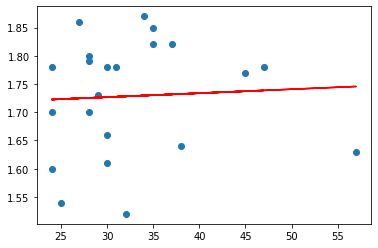

In [13]:
# Define the model
lm = LinearRegression()

# heights -> dependent variable
# ages -> independent variable

# Reshape
heights = heights.reshape(-1, 1)
ages = ages.reshape(-1, 1)

# Train the model
lm.fit(ages, heights)

# Plot
plt.scatter(ages, heights)
plt.plot(ages, lm.predict(ages), color = "red")

### ¿Es una buena técnica para este tipo de problemas? ¿Por qué?

No es un buen modelo por dos motivos:

1. La relación entre edad y altura no es lineal, sino más bien logarítmica. Es decir, de pequeños crecemos rápido, hasta cierta edad en la que no crecemos más.

2. La altura tiene más variables explicativas a parte de la edad. 

In [42]:
# Calculate the predicted values
predicted_heights = lm.predict(ages)

# To calculate the error, I calculate the difference between the prediction and reality
errors = np.subtract(heights, predicted_heights)

print("height - predicted_height = error\n")
for i in range(len(predicted_ages)):
    print("-" * 50)
    print(heights[i][0], "-", predicted_heights[i][0], "=", errors[i][0])

height - predicted_height = error

--------------------------------------------------
1.66 - 1.7267932569974551 = -0.0667932569974552
--------------------------------------------------
1.87 - 1.7295896946564882 = 0.14041030534351195
--------------------------------------------------
1.78 - 1.7274923664122135 = 0.05250763358778654
--------------------------------------------------
1.6 - 1.7225986005089056 = -0.12259860050890548
--------------------------------------------------
1.79 - 1.7253950381679386 = 0.06460496183206144
--------------------------------------------------
1.86 - 1.7246959287531802 = 0.13530407124681987
--------------------------------------------------
1.54 - 1.7232977099236637 = -0.18329770992366368
--------------------------------------------------
1.61 - 1.7267932569974551 = -0.11679325699745502
--------------------------------------------------
1.52 - 1.7281914758269716 = -0.20819147582697162
--------------------------------------------------
1.82 - 1.73168702290

In [54]:
# Function to add the absolute values
def sum_abs(x, y):
    return abs(x) + abs(y)

# Function to add the squared values
def sum_sq(x, y):
    return x ** 2 + y ** 2

# Import reduce to sum all the array
from functools import reduce


errors_list = list(errors.reshape(1, -1)[0])

MAE = reduce(sum_abs, errors_list) / len(errors_list)
MSE = reduce(sum_sq, errors_list) / len(errors_list)

print("MAE:", MAE)
print("MSE:", MSE)

MAE: 0.08670211658570447
MSE: 0.00013012160171184433


### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

En este caso, parece que el MAE es más representativo. Esto se debe a que las diferencias están por debajo de 1, y al elevarlas al cuadrado se hacen todavía más pequeñas, por lo que podríamos "menospreciar" estas diferencias si nos guíamos por el MSE en vez del MAE.

In [69]:
df = pd.DataFrame([ages.reshape(1, -1)[0], heights.reshape(1, -1)[0]]).T
df.columns = ["ages", "heights"]
df

,ages,heights
0,30.0,1.66
1,34.0,1.87
2,31.0,1.78
3,24.0,1.60
4,28.0,1.79
5,27.0,1.86
6,25.0,1.54
7,30.0,1.61
8,32.0,1.52
9,37.0,1.82


<AxesSubplot:>

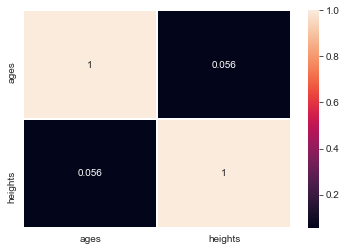

In [74]:
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 0.15)

### Representa la matriz de correlación, ¿los datos están correlacionados?

Parece que los datos están poco (o nada) correlacionados.

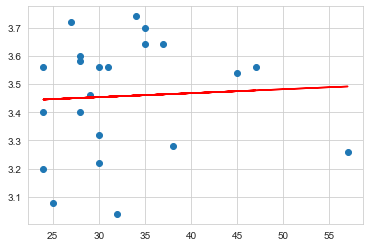

In [76]:
# 1) let's multiply the heights by 2
heights_2 = heights * 2

lm2 = LinearRegression()

# Train the model
lm2.fit(ages, heights_2)

# Plot
plt.scatter(ages, heights_2)
plt.plot(ages, lm2.predict(ages), color = "red")

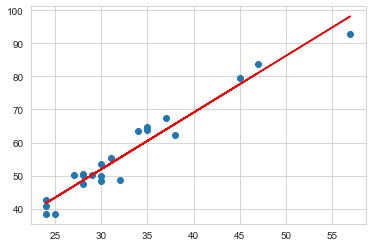

In [79]:
# 2) Let's multiply the heights now by the age

# 1) let's multiply the heights by 2
heights_3 = heights * ages

lm3 = LinearRegression()

# Train the model
lm3.fit(ages, heights_3)

# Plot
plt.scatter(ages, heights_3)
plt.plot(ages, lm3.predict(ages), color = "red")

In [82]:
# Let's compare all the models

# Betas
beta_1 = lm.coef_
beta_2 = lm2.coef_
beta_3 = lm3.coef_

# Errors
mae_1 = mean_absolute_error(heights, lm.predict(ages))
mse_1 = mean_squared_error(heights, lm.predict(ages))

mae_2 = mean_absolute_error(heights_2, lm2.predict(ages))
mse_2 = mean_squared_error(heights_2, lm2.predict(ages))

mae_3 = mean_absolute_error(heights_3, lm3.predict(ages))
mse_3 = mean_squared_error(heights_3, lm3.predict(ages))

# Scores
score_1 = lm.score(ages, heights)
score_2 = lm2.score(ages, heights_2)
score_3 = lm3.score(ages, heights_3)

print("Model 1")
print("Betas:", beta_1)
print("MAE:", mae_1)
print("MSE:", mse_1)
print("Score:", score_1)
print("-" * 50)
print("Model 2")
print("Betas:", beta_2)
print("MAE:", mae_2)
print("MSE:", mse_2)
print("Score:", score_2)
print("-" * 50)
print("Model 3")
print("Betas:", beta_3)
print("MAE:", mae_3)
print("MSE:", mse_3)
print("Score:", score_3)

Model 1
Betas: [[0.00069911]]
MAE: 0.08670211658570447
MSE: 0.010125482593106644
Score: 0.0031257348175154354
--------------------------------------------------
Model 2
Betas: [[0.00139822]]
MAE: 0.17340423317140893
MSE: 0.040501930372426574
Score: 0.0031257348175154354
--------------------------------------------------
Model 3
Betas: [[1.71342112]]
MAE: 2.8303935924126753
MSE: 10.68140831482767
Score: 0.9469610143574616


### ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?

Cuando multiplicamos por dos, podemos ver que el error aumenta, aunque el score se mantiene igual. Esto tiene sentido porque hemos hecho una transformación lineal a todo el vector "heights". Esto hace que la pendiente aumente proporcionalmente (x2), pero no mejora la capacidad predictiva del modelo.

Sin embargo, al multiplicar las alturas por las edades, el modelo sobre la marcha mejora su capacidad predectiva (aunque también el error es algo mayor). Esto es totalmente lógico, porque estamos establecido una relación directa entre heights y ages, al multiplicarlos.